<a href="https://colab.research.google.com/github/mnocerino23/Wildfire-Forecaster/blob/main/Classifiers_classlabels2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now that we have gathered data from kaggle, NOAA, the California Department of Water resources, and the Open-Elevation API into two consistent datasets, we will drop columns that are not necessary for training our models and take care of some final preprocessing.

In this file, I will start to build multi-class classifiers using Support Vector Machine, Gaussian Naive Bayes, Decision Tree, Random Forest, KNN, Gradient Boosting, and Neural Networks. 

The target feature will be ***Fire Size Class*** as we want to predict the size/risk of a large fire given certain weather and snow conditions.


I will deploy the following techniques:

1.   One-Hot Encoding of Categorical Variables
2.   Feature Selection
3.   Splitting the training and testing data
4.   Cross-Validation

In [1]:
import sklearn
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#Read in the two final datasets. The first contains over 110,000 fires from 2001-2015 while the second has 1,000 more recent, larger fires.
wildfire_set1 = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Wildfires/wildfire_set1_w_allfeatures.csv')
wildfire_set2 = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Wildfires/wildfire_set2_w_allfeatures.csv')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
wildfire_set1.head(5)

,Unnamed: 0,Year,Name,AcresBurned,Fire Size Rank,Cause,SOURCE_REPORTING_UNIT_NAME,DaysBurn,Discovery Month,Discovered DOY,...,DX90_2M,DP10_2M,Receives Snow,Snow Station,River Basin,Mar_SP,Mar_WC,Mar_Dens,Has_Elevation,Elevation
0,0,2005,FOUNTAIN,0.10,A,Miscellaneous,Plumas National Forest,1.0,Feb,33.0,...,0.0,19.0,1.0,eureka_lake,Feather,79.6,34.0,0.43,1,2965.8432
1,1,2004,PIGEON,0.25,A,Lightning,Eldorado National Forest,1.0,May,133.0,...,0.0,3.0,1.0,ward_creek_2,Lake Tahoe,108.6,38.1,0.35,1,6207.2736
2,2,2004,SLACK,0.10,A,Debris Burning,Eldorado National Forest,1.0,Jun,152.0,...,0.0,11.0,1.0,ward_creek_2,Lake Tahoe,108.6,38.1,0.35,1,3454.6824
3,3,2004,DEER,0.10,A,Lightning,Eldorado National Forest,5.0,Jun,180.0,...,0.0,3.0,1.0,echo_summit,American,87.2,28.4,0.33,1,7759.0920
4,4,2004,STEVENOT,0.10,A,Lightning,Eldorado National Forest,5.0,Jun,180.0,...,0.0,3.0,1.0,echo_summit,American,87.2,28.4,0.33,1,7598.3328


In [3]:
wildfire_set2.head()

,Unnamed: 0,Year,Name,AcresBurned,Fire Size Rank,Cause,SOURCE_REPORTING_UNIT_NAME,DaysBurn,Discovery Month,Discovered DOY,...,DX90_2M,DP10_2M,Receives Snow,Snow Station,River Basin,Mar_SP,Mar_WC,Mar_Dens,Has_Elevation,Elevation
0,0,2016,Soberanes Fire,132127.0,G,NaN,NaN,83.0,Jul,NaN,...,0.0,1.0,0,NaN,NaN,0.0,0.0,0.00,1,961.2744
1,1,2016,Erskine Fire,48019.0,G,NaN,NaN,18.0,Jun,NaN,...,15.0,4.0,1,mineral_king,Kaweah,36.0,16.0,0.44,1,3389.0664
2,2,2016,Chimney Fire,46344.0,G,NaN,NaN,24.0,Aug,NaN,...,43.0,0.0,0,NaN,NaN,0.0,0.0,0.00,1,1049.8560
3,3,2016,Blue Cut Fire,36274.0,G,NaN,NaN,7.0,Aug,NaN,...,43.0,0.0,0,NaN,NaN,0.0,0.0,0.00,1,4192.8624
4,4,2016,Gap Fire,33867.0,G,NaN,NaN,1.0,Aug,NaN,...,0.0,2.0,1,parks_creek,Shasta,77.0,34.0,0.44,1,3244.7112


In [4]:
print(wildfire_set1.columns)

Index(['Unnamed: 0', 'Year', 'Name', 'AcresBurned', 'Fire Size Rank', 'Cause',
       'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovery Month',
       'Discovered DOY', 'Contained Month', 'Contained DOY', 'Latitude',
       'Longitude', 'County', 'CountyIds', 'State', 'OWNER_DESCR',
       'NOAA Station', 'Link', 'AWND', 'CLDD', 'DP10', 'DX90', 'PRCP', 'TAVG',
       'TMAX', 'TMIN', 'PRCP_6M', 'PRCP_RS', 'DX90_2M', 'DP10_2M',
       'Receives Snow', 'Snow Station', 'River Basin', 'Mar_SP', 'Mar_WC',
       'Mar_Dens', 'Has_Elevation', 'Elevation'],
      dtype='object')


In [5]:
print(wildfire_set2.columns)

Index(['Unnamed: 0', 'Year', 'Name', 'AcresBurned', 'Fire Size Rank', 'Cause',
       'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovery Month',
       'Discovered DOY', 'Contained Month', 'Contained DOY', 'Latitude',
       'Longitude', 'County', 'CountyIds', 'State', 'OWNER_DESCR',
       'NOAA Station', 'Link', 'AWND', 'CLDD', 'DP10', 'DX90', 'PRCP', 'TAVG',
       'TMAX', 'TMIN', 'PRCP_6M', 'PRCP_RS', 'DX90_2M', 'DP10_2M',
       'Receives Snow', 'Snow Station', 'River Basin', 'Mar_SP', 'Mar_WC',
       'Mar_Dens', 'Has_Elevation', 'Elevation'],
      dtype='object')


Drop all columns that will not be relevant for our classification task:Unnamed: 0, Year, Name, Cause, SOURCE_REPORTING UNIT NAME, DaysBurn, Discovered DOY, Contained Month, Contained DOY, Lat, Long, County Ids, State, OWNER_DESCR, NOAA Station, Link, Snow Station, River Basin

In [6]:
wildfire_set1.drop(columns = ['Unnamed: 0', 'Year', 'Name', 'Cause',
                      'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovered DOY', 'Contained Month',
                      'Contained DOY','Latitude','Longitude','County','CountyIds','State','OWNER_DESCR',
                      'NOAA Station', 'Link', 'Snow Station', 'River Basin', 'Has_Elevation'], inplace = True)

In [7]:
wildfire_set2.drop(columns = ['Unnamed: 0', 'Year', 'Name', 'Cause',
                      'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovered DOY', 'Contained Month',
                      'Contained DOY','Latitude','Longitude','County','CountyIds','State','OWNER_DESCR',
                      'NOAA Station', 'Link', 'Snow Station', 'River Basin','Has_Elevation'], inplace = True)

Taking a look at both datasets now that we have dropped the nonrelevant columns

In [8]:
wildfire_set1.head(5)

,AcresBurned,Fire Size Rank,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
0,0.10,A,Feb,5.6,0.0,12.0,0.0,5.33,38.9,43.9,33.9,27.89,49.06,0.0,19.0,1.0,79.6,34.0,0.43,2965.8432
1,0.25,A,May,6.9,0.0,2.0,0.0,0.81,47.3,63.0,31.6,14.37,14.76,0.0,3.0,1.0,108.6,38.1,0.35,6207.2736
2,0.10,A,Jun,5.6,36.0,0.0,0.0,0.00,63.1,70.2,56.0,36.71,40.37,0.0,11.0,1.0,108.6,38.1,0.35,3454.6824
3,0.10,A,Jun,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,14.76,0.0,3.0,1.0,87.2,28.4,0.33,7759.0920
4,0.10,A,Jun,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,14.76,0.0,3.0,1.0,87.2,28.4,0.33,7598.3328


In [9]:
wildfire_set1.shape

(114558, 20)

In [10]:
wildfire_set2.head(5)

,AcresBurned,Fire Size Rank,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
0,132127.0,G,Jul,6.5,0.0,0.0,0.0,0.00,58.8,65.2,52.4,14.11,21.42,0.0,1.0,0,0.0,0.0,0.00,961.2744
1,48019.0,G,Jun,6.7,529.0,0.0,22.0,0.00,82.6,96.6,68.6,4.68,4.88,15.0,4.0,1,36.0,16.0,0.44,3389.0664
2,46344.0,G,Aug,6.9,237.0,0.0,23.0,0.00,72.6,92.6,52.6,2.52,8.09,43.0,0.0,0,0.0,0.0,0.00,1049.8560
3,36274.0,G,Aug,6.5,455.0,0.0,28.0,0.00,79.7,94.6,64.7,3.41,6.45,43.0,0.0,0,0.0,0.0,0.00,4192.8624
4,33867.0,G,Aug,4.5,0.0,0.0,0.0,0.02,56.4,62.9,49.9,18.03,54.17,0.0,2.0,1,77.0,34.0,0.44,3244.7112


In [11]:
wildfire_set2.shape

(1156, 20)

# Investigate the presence of null values in each dataset:
Below, we have the count of totall null values in each column for wildfire_set1 and wildfire_set2.

In [12]:
print(wildfire_set1.isnull().sum())

AcresBurned           0
Fire Size Rank        0
Discovery Month       0
AWND               6254
CLDD               3335
DP10               3042
DX90               3333
PRCP               3042
TAVG               3335
TMAX               3333
TMIN               3285
PRCP_6M            2470
PRCP_RS            2811
DX90_2M            2215
DP10_2M            1599
Receives Snow       102
Mar_SP              102
Mar_WC              102
Mar_Dens            102
Elevation             0
dtype: int64


In [13]:
print(wildfire_set2.isnull().sum())

AcresBurned         3
Fire Size Rank      0
Discovery Month     0
AWND               37
CLDD               37
DP10               32
DX90               34
PRCP               32
TAVG               37
TMAX               34
TMIN               37
PRCP_6M             7
PRCP_RS            10
DX90_2M             2
DP10_2M             1
Receives Snow       0
Mar_SP              0
Mar_WC              0
Mar_Dens            0
Elevation           0
dtype: int64


In [14]:
wildfire_set1 = wildfire_set1.dropna()

In [15]:
wildfire_set2 = wildfire_set2.dropna()

In the two cells above, we drop all null values in both datasets. We are able to drop all nulls in this case because our dataset is large with relatively few null values in each so not much data is lost in this process. Looking at the shapes of each dataframe after the drops, we see that both datasets remain a similar size post drop.

In [16]:
wildfire_set1.shape

(106024, 20)

In [17]:
wildfire_set2.shape

(1105, 20)

# To remind ourselves, as described by the database the original classes are as follows:

# A: 0-0.25 acres
# B=0.26-9.9 acres
# C=10.0-99.9 acres
# D=100-299 acres
# E=300 to 999 acres
# F=1000 to 4999 acres
# G=5000+ acres

As we can see below from the value counts for the Fire Size Rank column, the first dataset has an overwhelming amount of small wildfires from class A (0-0.25 acres) and class B (0.26-9.9), leading to a large imbalance in the first dataset.

In [18]:
print(wildfire_set1['Fire Size Rank'].value_counts())

A    55462
B    43118
C     5097
D     1096
E      597
F      406
G      248
Name: Fire Size Rank, dtype: int64


In [19]:
print(wildfire_set2['Fire Size Rank'].value_counts())

C    559
D    222
E    111
F    101
G     92
A     18
B      2
Name: Fire Size Rank, dtype: int64


Restrict each dataset to wildfires larger than 10 acres since those smaller than that are not substantial and the goal of this project is to predict areas prone to destruction by wildfire


I then create new criteria for fire class size to help balance out the first dataset which we will use to train our model:


In [25]:
w = wildfire_set1.loc[wildfire_set1['AcresBurned']> 10]

for index, rows in w.iterrows():
  size_fire = w.at[index, 'AcresBurned']
  if size_fire >= 10 and size_fire < 17.5:
    size_class = 'Very Small'
  if size_fire >= 17.5 and size_fire <= 30:
    size_class = 'Small'
  elif size_fire > 30 and size_fire <= 85:
    size_class = 'Medium'
  elif size_fire > 85 and size_fire <= 275:
    size_class = 'Large'
  elif size_fire > 275:
    size_class = 'Very Large'
  w.at[index,'Fire Size Rank'] = size_class

print(w['Fire Size Rank'].value_counts())

Medium        1617
Small         1407
Very Large    1297
Very Small    1234
Large         1174
Name: Fire Size Rank, dtype: int64


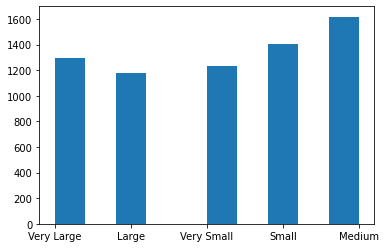

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = w['Fire Size Rank']

plt.hist(x)
plt.show()

In [27]:
w2 = wildfire_set2.loc[wildfire_set2['AcresBurned']>10]

for index, rows in w2.iterrows():
  size_fire = w2.at[index, 'AcresBurned']
  if size_fire >= 10 and size_fire < 17.5:
    size_class = 'Very Small'
  if size_fire >= 17.5 and size_fire <= 30:
    size_class = 'Small'
  elif size_fire > 30 and size_fire <= 85:
    size_class = 'Medium'
  elif size_fire > 85 and size_fire <= 275:
    size_class = 'Large'
  elif size_fire > 275:
    size_class = 'Very Large'
  w2.at[index,'Fire Size Rank'] = size_class


print(w2['Fire Size Rank'].value_counts())

Very Large    316
Medium        282
Large         239
Small         132
Very Small     76
Name: Fire Size Rank, dtype: int64
